In [13]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# load dataset from core nb
mnist = fetch_openml('mnist_784', version=1) # set asframe = False to import the dataset as nparray
X, y = mnist['data'], mnist['target']
Xarray = np.array(X)

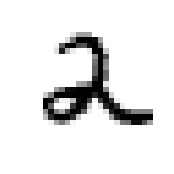

In [15]:
def plot_num (arr):
    arr = arr.reshape(28,28)
    plt.figure(figsize=[2,2])
    plt.imshow(arr, cmap = 'binary')
    plt.axis('off')
    plt.show()


# for i in range(10):
#     plot_num(Xarray[i])

plot_num(Xarray[9897])


In [16]:
XT, Xt, yT, yt = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XT_scaled = scaler.fit_transform(XT)

## KNN (improves accuracy)

single label

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [19]:
from sklearn.model_selection import cross_val_predict, cross_val_score

y_pred_cv = cross_val_predict(knn_clf, XT_scaled, yT, cv=3 )

In [20]:
accuracy_scores = cross_val_score(knn_clf, XT_scaled, yT, cv=3 )
accuracy_scores

array([0.9376, 0.9411, 0.9424])

#### Important insights:

If we compare it to other algorithms (sgd_clsf, SVM multiclass) clearly there are 2 conclusions:

- the performance is better in terms of accuracy 
- KNN is almost 5* faster (*why?*)

In [11]:
from sklearn.metrics import confusion_matrix

confx_mat = confusion_matrix(yT, y_pred_cv)
confx_mat

array([[5826,    4,   17,    6,    1,   17,   40,    4,    5,    3],
       [   2, 6670,   18,    6,    8,    4,   17,   11,    4,    2],
       [  71,   66, 5534,   92,   33,    8,   50,   53,   36,   15],
       [  13,   29,   57, 5789,    4,   79,    7,   68,   52,   33],
       [   9,   75,   54,    9, 5416,   17,   23,   29,    9,  201],
       [  33,   17,   15,  168,   16, 4984,   88,   13,   39,   48],
       [  61,   16,   21,    3,   14,   48, 5747,    1,    7,    0],
       [  12,   64,   25,   18,   78,    2,    0, 5854,    3,  209],
       [  57,   88,   52,  121,   48,  217,   32,   21, 5140,   75],
       [  20,   15,   22,   54,  127,   13,    0,  214,   22, 5462]],
      dtype=int64)

In [21]:
_, counts = np.unique(yT, return_counts=True)
counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

Even by looking at the confusion matrix for knn vis-à-vis sgd_classifier or svm, the off diagonal elements are much smaller; so we have also improved precision and recall _with_ accuracy. 

## KNN on multiple labels

Say there are 2 target variables: (boolean)

- y1: whether prediction is >=7 
- y2: whether the number is odd 

In [24]:
yT = yT.astype('int64')

In [31]:
# create the target variable arrays for training
# XT will remain the same ;)

y_grt_7 = (yT >=7)

y_odd = (yT % 2 == 1)

y_multilabel = np.c_[y_grt_7, y_odd]
y_multilabel.shape

(60000, 2)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# knn_clf2 = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_clf2 = KNeighborsClassifier()

knn_clf2.fit(XT, y_multilabel)

KNeighborsClassifier()

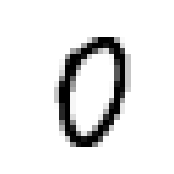

In [40]:
some_digit = Xarray[1000]
plot_num(some_digit)

In [38]:
knn_clf2.predict([some_digit])

c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False, False]])

Calling the classifier with y_multilabel is enough to convey that the expected output is also multilabel. The output for some_digit (=0) is in accrodance with correct responses to the questions to which we demand answers. 

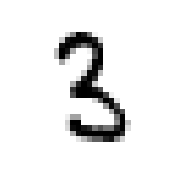

In [48]:
other_digit = Xarray[34788]
plot_num(other_digit)

In [49]:
knn_clf2.predict([other_digit])

c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

### Evaluating multilabel classification

There is no generic way; it depends on the specific problem at hand. Sometimes, performance on individual labels may be evaluated independently. Or if they are dependent, using some real world information, benchmarks can be set. 

For ex: ` f1_score(y_multilabel, y_train_knn_pred, average="macro")`
This code computes the average F1 score across all labels. <br>

Average may not be the best metric, but is one _possible_ metric. 